In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generating_function(x, a0, a1, a2, a3, a4):
    return a0 + a1*np.array(x) + a2*np.sin(a4*np.array(x)) + a3*np.cos(a4*np.array(x))


def fit_function1(x, a0, a1, a2, a3, a4):
    return a0 + a1*np.array(x) + a2*np.sin(a4*np.array(x)) + a3*np.cos(a4*np.array(x))

def fit_function2(x, a0, a1, a2, a3, a4):
    return a0 + a1*np.array(x) + a2*np.sin(a3*np.array(x) + a4)    

In [3]:
def generate_data(n, a0, a1, a2, a3, a4, sigma,low,high):
    x = np.random.uniform(low, high, n)
    y = generating_function(x, a0, a1, a2, a3, a4) + np.random.normal(0, sigma, n)
    return x, y

In [4]:
a0 = 1
a1 = 1
a2 = 1
a3 = 1
a4 = 0

sigma = 0.5
low = 20   
high = 35
n = 100

In [5]:
x, y = generate_data(n, a0, a1, a2, a3, a4, sigma,low,high)

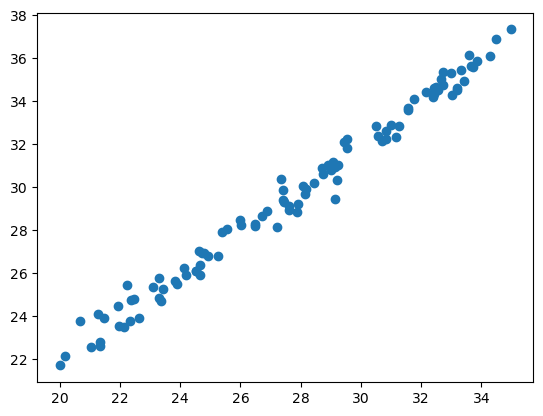

In [6]:
plt.plot(x, y, 'o')

In [7]:
from scipy.optimize import curve_fit    
popt1, pcov1 = curve_fit(fit_function1, x, y)
perr1 = np.sqrt(np.diag(pcov1))
popt2, pcov2 = curve_fit(fit_function2, x, y)
perr2 = np.sqrt(np.diag(pcov2))

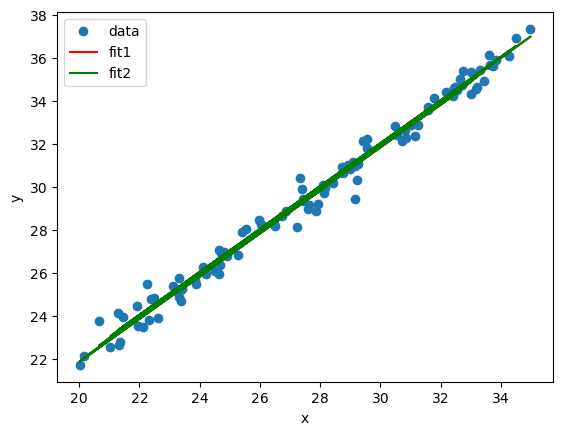

In [8]:
plt.plot(x, y, 'o')
plt.plot(x, fit_function1(x, *popt1), 'r-')
plt.plot(x, fit_function2(x, *popt2), 'g-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data', 'fit1', 'fit2'], loc='best')

In [9]:
print(popt1)
print(perr1)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fit_function1(x[i],*popt1))
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma*sigma)

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-5))

[1.91287561 1.00078452 0.04164463 0.1067406  1.47477835]
[0.35622037 0.01282505 0.45629649 0.19194641 0.15281075]
Chi^2 / dof = 9.596E+01 / 95


In [10]:
print(popt2)
print(perr2)

yfit = []
chi2=0
for i in range (0,n):
    yfit.append(fit_function2(x[i],*popt2))
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma*sigma)

print ("Chi^2 / dof = %.3E / %d" % (chi2,n-5))

[  1.9129029    1.00078343   0.11457664   1.47481775 -11.36855603]
[0.35621863 0.01282496 0.0762604  0.15281011 4.26885201]
Chi^2 / dof = 9.596E+01 / 95


In [11]:
print('Comparison:')
print('a0: ', a0, popt1[0], popt2[0])
print('a1: ', a1, popt1[1], popt2[1])
print('a2: ', a2, popt1[2], popt2[2]*np.cos(popt2[4]))
print('a3: ', a3, popt1[3], popt2[2]*np.sin(popt2[4]))
print('a4: ', a4, popt1[4], popt2[3])

print('Errors:')
print('a0: ', perr1[0], perr2[0])
print('a1: ', perr1[1], perr2[1])
print('a2: ', perr1[2], np.sqrt(np.abs(perr2[2]*np.cos(popt2[4]))**2 + np.abs(popt2[2]*np.sin(popt2[4])*perr2[4]))**2)
print('a3: ', perr1[3], np.sqrt(np.abs(perr2[2]*np.sin(popt2[4]))**2 + np.abs(popt2[2]*np.cos(popt2[4])*perr2[4]))**2)
print('a4: ', perr1[4], perr2[3])


Comparison:
a0:  1 1.912875605439383 1.9129028962279295
a1:  1 1.0007845184936974 1.0007834267872078
a2:  1 0.04164462662592981 0.04175101435024246
a3:  1 0.10674059935104496 0.10669891692353642
a4:  0 1.4747783465641902 1.474817753098015
Errors:
a0:  0.3562203680559354 0.3562186314307501
a1:  0.012825046332004951 0.012824959243314091
a2:  0.4562964932542744 0.4562541045043845
a3:  0.19194641024273526 0.18327233236122706
a4:  0.15281074509328701 0.1528101055481983
